# Aufgabe 2: Multi-Class Perceptrons

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs #for data generatio

In [124]:
X, y = make_blobs(n_samples=50, centers=3, cluster_std=0.2,n_features=2,center_box=(1,5),random_state=104)

In [125]:
y

array([0, 1, 2, 1, 2, 2, 1, 0, 2, 2, 0, 2, 0, 1, 1, 0, 0, 1, 1, 0, 2, 1,
       2, 1, 1, 1, 0, 1, 2, 1, 2, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2,
       1, 0, 0, 1, 0, 1])

In [126]:
def plot_line_from_normal_vector_and_offset(normal_vector, offset, x_range=None, ax=None, **kwargs):
    """
    Plots a 2D line defined by its normal vector w and offset b such that wx + b = 0.

    Args:
        normal_vector (list or numpy.ndarray): A 2D vector representing the normal to the line (w). Must be of length 2.
        offset (float): The offset (b) such that w.x + b = 0.
        x_range (tuple, optional): A tuple (xmin, xmax) specifying the range of x-values to plot.
                                     If None (default), a reasonable range is automatically determined.
        ax (matplotlib.axes._axes.Axes, optional): The matplotlib axes object to plot on. If None (default),
                                                  the current axes (plt.gca()) is used, or a new figure and axes
                                                  are created.
        **kwargs: Keyword arguments to pass to the `plot` function (e.g., color, linestyle, linewidth).

    Returns:
        matplotlib.lines.Line2D: The line object created by `ax.plot`.
    """
    normal_vector = np.array(normal_vector)  # Ensure it's a NumPy array for calculations

    if normal_vector.shape != (2,):
        raise ValueError("Normal vector must be a 2D vector (length 2).")

    w1, w2 = normal_vector

    if ax is None:
        fig, ax = plt.subplots()

    if x_range is None:
        # Determine a reasonable x-range
        xmin = -5
        xmax = 5
        x_range = (xmin, xmax)

    xmin, xmax = x_range
    x = np.linspace(xmin, xmax, 100)  # Generate x-values

    if w2 != 0:
        y = (-w1 * x - offset) / w2  # Solve for y: w1*x + w2*y + b = 0  =>  y = (-w1*x - b) / w2
    else:
        # Handle the case where the line is vertical (w2=0). Plot a vertical line.
        if w1 == 0:
            raise ValueError("Cannot plot line with w1=0 and w2=0.")
        x = np.full_like(x, -offset / w1)  # x is constant for a vertical line
        y = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100)  # generate y values spanning the current y-axis.



    line, = ax.plot(x, y, **kwargs)

    return line

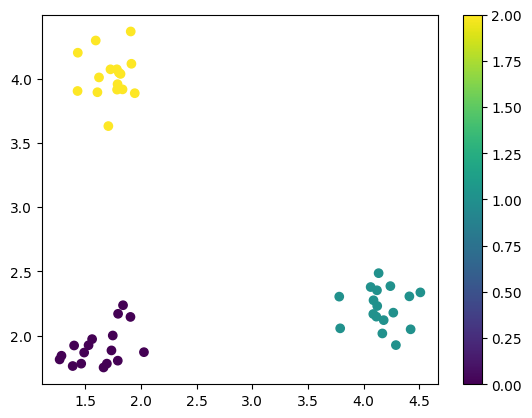

In [127]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.colorbar()

### draw Percepton layout
* Hint: now we have more then one Perceptron
* write math. formulation as linear model

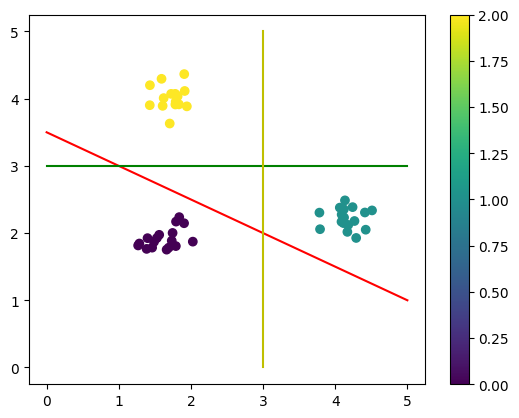

In [128]:
plt.scatter(X[:,0],X[:,1],c=y)


line1x= np.arange(0,6)
line1y= lambda x: (x * -0.5) +3.5

line2x = np.arange(0,6)
line2y = lambda x: (x * (0)) + 3

plt.plot(line1x,line1y(line1x), 'r-')
plt.plot(line2x,line2y(line1x), 'g-')
plt.plot(line2y(line1x),line2x, 'y-')
plt.plot()
plt.colorbar()

### Transform lables to one-hot coding
* Hint: Use Scikit-Learn

In [129]:
from sklearn.preprocessing import OneHotEncoder

In [130]:
y

array([0, 1, 2, 1, 2, 2, 1, 0, 2, 2, 0, 2, 0, 1, 1, 0, 0, 1, 1, 0, 2, 1,
       2, 1, 1, 1, 0, 1, 2, 1, 2, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2,
       1, 0, 0, 1, 0, 1])

In [131]:
onehot = OneHotEncoder()
y_one = onehot.fit_transform(y.reshape(-1,1)).toarray()

In [132]:
y_one_scaled=(y_one*2-1)

### Manually find parameters $w$ and $b$ for
* for each Perceptron seperately
* then combine to single matrix multiplication formulation

In [133]:
def plot_line_from_normal_vector_and_offset(normal_vector, offset, x_range=None, ax=None, **kwargs):
    """
    Plots a 2D line defined by its normal vector w and offset b such that wx + b = 0.

    Args:
        normal_vector (list or numpy.ndarray): A 2D vector representing the normal to the line (w). Must be of length 2.
        offset (float): The offset (b) such that w.x + b = 0.
        x_range (tuple, optional): A tuple (xmin, xmax) specifying the range of x-values to plot.
                                     If None (default), a reasonable range is automatically determined.
        ax (matplotlib.axes._axes.Axes, optional): The matplotlib axes object to plot on. If None (default),
                                                  the current axes (plt.gca()) is used, or a new figure and axes
                                                  are created.
        **kwargs: Keyword arguments to pass to the `plot` function (e.g., color, linestyle, linewidth).

    Returns:
        matplotlib.lines.Line2D: The line object created by `ax.plot`.
    """
    normal_vector = np.array(normal_vector)  # Ensure it's a NumPy array for calculations

    if normal_vector.shape != (2,):
        raise ValueError("Normal vector must be a 2D vector (length 2).")

    w1, w2 = normal_vector

    if ax is None:
        fig, ax = plt.subplots()

    if x_range is None:
        # Determine a reasonable x-range
        xmin = -5
        xmax = 5
        x_range = (xmin, xmax)

    xmin, xmax = x_range
    x = np.linspace(xmin, xmax, 100)  # Generate x-values

    if w2 != 0:
        y = (-w1 * x - offset) / w2  # Solve for y: w1*x + w2*y + b = 0  =>  y = (-w1*x - b) / w2
    else:
        # Handle the case where the line is vertical (w2=0). Plot a vertical line.
        if w1 == 0:
            raise ValueError("Cannot plot line with w1=0 and w2=0.")
        x = np.full_like(x, -offset / w1)  # x is constant for a vertical line
        y = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100)  # generate y values spanning the current y-axis.



    line, = ax.plot(x, y, **kwargs)

    return line

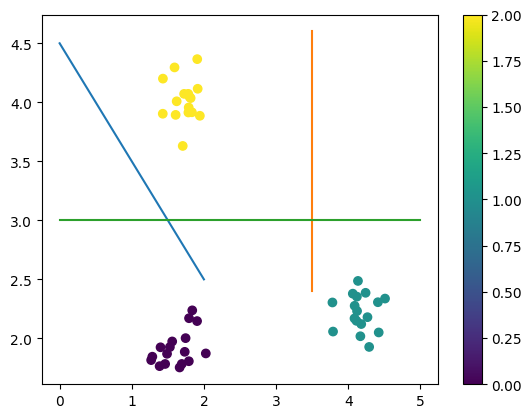

In [134]:
fig, ax1 = plt.subplots()

w1 = np.array([-1,-1])
b1 = (4.5)

w3 = np.array([0,1])
b3 = (-3)

w2 = np.array([1,0])
b2 = (-3.5)

line1 = plot_line_from_normal_vector_and_offset(w1,b1,x_range= [0,2], ax= ax1)
line2 = plot_line_from_normal_vector_and_offset(w2,b2,x_range= [0,5], ax= ax1)
line3 = plot_line_from_normal_vector_and_offset(w3,b3,x_range= [0,5], ax= ax1)

plt.scatter(X[:,0],X[:,1],c=y)
plt.colorbar()

#### test single perceptrons by class


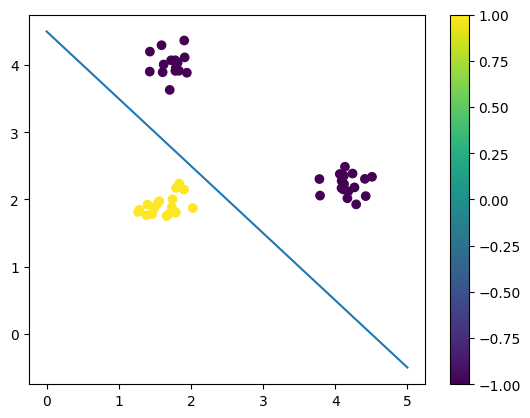

In [135]:
pos=np.where(y_one_scaled[:,0]!=np.sign(w1.dot(X.T)+b1))
y_test=np.copy(y_one_scaled[:,0])
y_test[pos]= 0
plot_line_from_normal_vector_and_offset(w1,b1,x_range= [0,5])
plt.scatter(X[:,0],X[:,1],c=y_test)#set color
plt.colorbar()

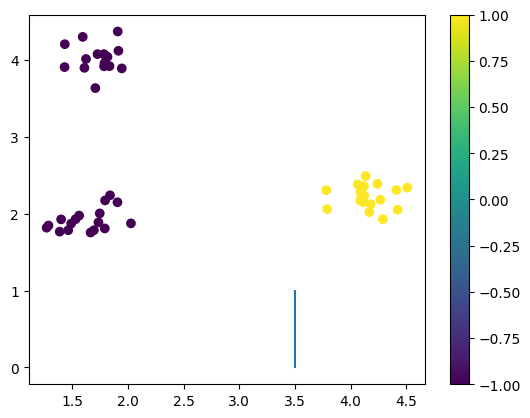

In [136]:
# get IDs of wrong classified
pos=np.where(y_one_scaled[:,1]!=np.sign(w2.dot(X.T)+b2))
y_test=np.copy(y_one_scaled[:,1])
y_test[pos]= 0
plot_line_from_normal_vector_and_offset(w2,b2,x_range= [0,5])
plt.scatter(X[:,0],X[:,1],c=y_test)
plt.colorbar()

(array([], dtype=int64),)
[-1. -1.  1. -1.  1.  1. -1. -1.  1.  1. -1.  1. -1. -1. -1. -1. -1. -1.
 -1. -1.  1. -1.  1. -1. -1. -1. -1. -1.  1. -1.  1. -1. -1. -1.  1.  1.
  1. -1.  1. -1. -1.  1. -1.  1. -1. -1. -1. -1. -1. -1.]


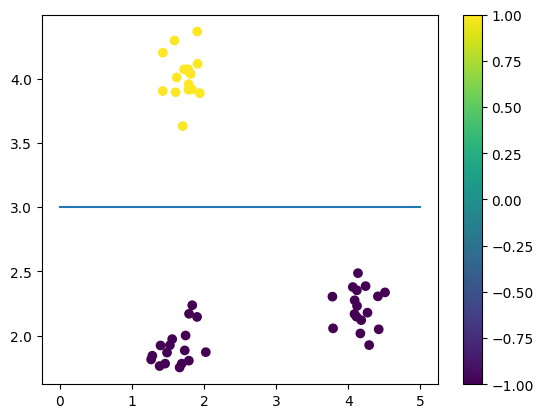

In [137]:
# get IDs of wrong classified
pos=np.where(y_one_scaled[:,2]!=np.sign(w3.dot(X.T)+b3))
print(pos)
y_test=np.copy(y_one_scaled[:,2])
y_test[pos]= 0
print(y_test)
plot_line_from_normal_vector_and_offset(w3,b3,x_range= [0,5])
plt.scatter(X[:,0],X[:,1],c=y_test)#set color
plt.colorbar()
#abline(1,2)

#### test full Setup

## Add non-linear activation / loss -> $softmax$
* implement a $softmax$ function
* replace $sgn$ by $softmax$
* plot confidence of the test samples

In [141]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x)/sum(np.exp(x))

In [139]:
y_neu = np.argmax((softmax(w1.dot(X.T)+b1),softmax(w2.dot(X.T)+b2),softmax(w3.dot(X.T)+b3)),axis=0)
y_neu

array([0, 1, 2, 1, 2, 2, 1, 0, 2, 2, 0, 2, 0, 1, 1, 0, 0, 1, 1, 0, 2, 1,
       2, 1, 1, 1, 0, 1, 2, 1, 2, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2,
       1, 0, 0, 1, 0, 1])

(array([], dtype=int64),)


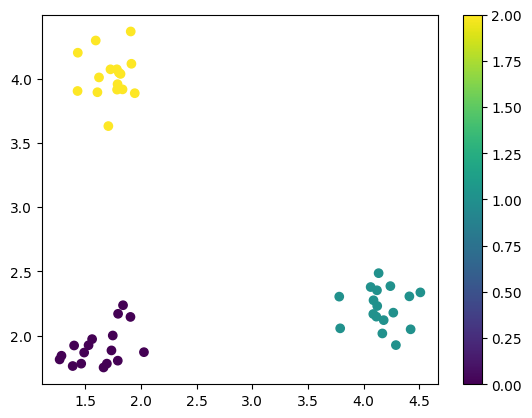

In [145]:
# Falsch klassifizierten anzeigen
pos=np.where(y!=y_neu)
print(pos)
y_test=np.copy(y)
y_test[pos]= 4
plt.scatter(X[:,0],X[:,1],c=y_test)
plt.colorbar()

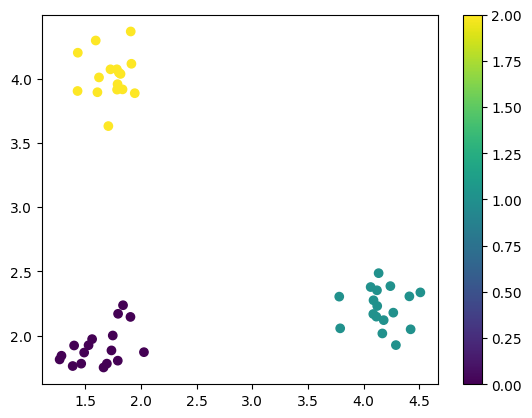

In [140]:
plt.scatter(X[:,0],X[:,1],c=y_neu)#set color
plt.colorbar()